In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE" #this is a patch I hade to make to plot as I have dll conflicts. 

#bash >>>setx KMP_DUPLICATE_LIB_OK "TRUE"


In [2]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, project_root)


### ASR

In [35]:
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import sounddevice as sd
import numpy as np
import torch

# load pretrained
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h-lv60-self")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h-lv60-self")
model.eval()

sr = 16000

print("Recording 5 seconds...")
audio = sd.rec(int(sr*5), samplerate=sr, channels=1, device=3 ) # << your mic index)
sd.wait()

# flatten to mono
audio = audio.flatten()
inputs = processor(audio, return_tensors="pt", sampling_rate=sr)
with torch.no_grad():
    logits = model(inputs.input_values).logits
pred_ids = torch.argmax(logits, dim=-1)
text = processor.decode(pred_ids[0])
print(">>", text)


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h-lv60-self and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Recording 5 seconds...
>> THIS IS TESTING TEM TELL ME IF YOU CAN HEAR ME O K


### Wave2Vec2 Info

In [3]:
from emotion_classifier.models.emotion_model import EmotionModel

In [14]:
model = EmotionModel(
    encoder_name="wav2vec2",
    dropout=0.3,
    hidden_dim=256,
    num_classes=8,
    freeze_encoder=True,  # or True
    unfreeze_last_n_layers=4,
)


Inside EmotionModel
Encoder Bundle Extracted


In [15]:
for name, param in model.encoder.encoder.transformer.named_parameters():
    print(f"{name}: requires_grad={param.requires_grad}")


pos_conv_embed.conv.bias: requires_grad=False
pos_conv_embed.conv.parametrizations.weight.original0: requires_grad=False
pos_conv_embed.conv.parametrizations.weight.original1: requires_grad=False
layer_norm.weight: requires_grad=False
layer_norm.bias: requires_grad=False
layers.0.attention.k_proj.weight: requires_grad=False
layers.0.attention.k_proj.bias: requires_grad=False
layers.0.attention.v_proj.weight: requires_grad=False
layers.0.attention.v_proj.bias: requires_grad=False
layers.0.attention.q_proj.weight: requires_grad=False
layers.0.attention.q_proj.bias: requires_grad=False
layers.0.attention.out_proj.weight: requires_grad=False
layers.0.attention.out_proj.bias: requires_grad=False
layers.0.layer_norm.weight: requires_grad=False
layers.0.layer_norm.bias: requires_grad=False
layers.0.feed_forward.intermediate_dense.weight: requires_grad=False
layers.0.feed_forward.intermediate_dense.bias: requires_grad=False
layers.0.feed_forward.output_dense.weight: requires_grad=False
layers.

### HuBert Info

In [1]:
#from emotion_classifier.models.emotion_model import EmotionModel
import torchaudio

In [4]:
model = EmotionModel(
    encoder_name="hubert",
    dropout=0.3,
    hidden_dim=256,
    num_classes=8,
    freeze_encoder=True,  # or True
    unfreeze_last_n_layers=4,
)


Inside EmotionModel


In [5]:
import torchaudio
bundle = torchaudio.pipelines.HUBERT_BASE
model = bundle.get_model()
model

Wav2Vec2Model(
  (feature_extractor): FeatureExtractor(
    (conv_layers): ModuleList(
      (0): ConvLayerBlock(
        (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
      )
      (1-4): 4 x ConvLayerBlock(
        (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
      )
      (5-6): 2 x ConvLayerBlock(
        (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
      )
    )
  )
  (encoder): Encoder(
    (feature_projection): FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (pos_conv_embed): ConvolutionalPositionalEmbedding(
        (conv): ParametrizedConv1d(
          768, 768, kernel_size=(128,), stride=(1,), padding=(64,), groups=16
          (parametriza

In [5]:
bundle

Wav2Vec2Bundle(_path='hubert_fairseq_base_ls960.pth', _params={'extractor_mode': 'group_norm', 'extractor_conv_layer_config': [(512, 10, 5), (512, 3, 2), (512, 3, 2), (512, 3, 2), (512, 3, 2), (512, 2, 2), (512, 2, 2)], 'extractor_conv_bias': False, 'encoder_embed_dim': 768, 'encoder_projection_dropout': 0.1, 'encoder_pos_conv_kernel': 128, 'encoder_pos_conv_groups': 16, 'encoder_num_layers': 12, 'encoder_num_heads': 12, 'encoder_attention_dropout': 0.1, 'encoder_ff_interm_features': 3072, 'encoder_ff_interm_dropout': 0.0, 'encoder_dropout': 0.1, 'encoder_layer_norm_first': False, 'encoder_layer_drop': 0.05, 'aux_num_out': None}, _sample_rate=16000, _normalize_waveform=False, _model_type='Wav2Vec2')

In [6]:
model.encoder.transformer.layers

ModuleList(
  (0-11): 12 x EncoderLayer(
    (attention): SelfAttention(
      (k_proj): Linear(in_features=768, out_features=768, bias=True)
      (v_proj): Linear(in_features=768, out_features=768, bias=True)
      (q_proj): Linear(in_features=768, out_features=768, bias=True)
      (out_proj): Linear(in_features=768, out_features=768, bias=True)
    )
    (dropout): Dropout(p=0.1, inplace=False)
    (layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (feed_forward): FeedForward(
      (intermediate_dense): Linear(in_features=768, out_features=3072, bias=True)
      (intermediate_dropout): Dropout(p=0.0, inplace=False)
      (output_dense): Linear(in_features=3072, out_features=768, bias=True)
      (output_dropout): Dropout(p=0.1, inplace=False)
    )
    (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
)

In [28]:
freeze_encoder = True
if freeze_encoder:
    for param in model.encoder.parameters():
        param.requires_grad = False
        
unfreeze_last_n_layers = 5
# Unfreeze the last N transformer layers (if supported)

transformer_layers = model.encoder.transformer.layers
for layer in transformer_layers[-unfreeze_last_n_layers:]:
    for param in layer.parameters():
        param.requires_grad = True
        print(f"[Info] Encoder layer '{layer}' will be trained.")


[Info] Encoder layer 'EncoderLayer(
  (attention): SelfAttention(
    (k_proj): Linear(in_features=768, out_features=768, bias=True)
    (v_proj): Linear(in_features=768, out_features=768, bias=True)
    (q_proj): Linear(in_features=768, out_features=768, bias=True)
    (out_proj): Linear(in_features=768, out_features=768, bias=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (feed_forward): FeedForward(
    (intermediate_dense): Linear(in_features=768, out_features=3072, bias=True)
    (intermediate_dropout): Dropout(p=0.0, inplace=False)
    (output_dense): Linear(in_features=3072, out_features=768, bias=True)
    (output_dropout): Dropout(p=0.1, inplace=False)
  )
  (final_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)' will be trained.
[Info] Encoder layer 'EncoderLayer(
  (attention): SelfAttention(
    (k_proj): Linear(in_features=768, out_features=768, bias=True)
    (v_proj): Linea

In [29]:
for name, param in model.encoder.transformer.named_parameters():
    print(f"{name}: requires_grad={param.requires_grad}")


pos_conv_embed.conv.bias: requires_grad=False
pos_conv_embed.conv.parametrizations.weight.original0: requires_grad=False
pos_conv_embed.conv.parametrizations.weight.original1: requires_grad=False
layer_norm.weight: requires_grad=False
layer_norm.bias: requires_grad=False
layers.0.attention.k_proj.weight: requires_grad=False
layers.0.attention.k_proj.bias: requires_grad=False
layers.0.attention.v_proj.weight: requires_grad=False
layers.0.attention.v_proj.bias: requires_grad=False
layers.0.attention.q_proj.weight: requires_grad=False
layers.0.attention.q_proj.bias: requires_grad=False
layers.0.attention.out_proj.weight: requires_grad=False
layers.0.attention.out_proj.bias: requires_grad=False
layers.0.layer_norm.weight: requires_grad=False
layers.0.layer_norm.bias: requires_grad=False
layers.0.feed_forward.intermediate_dense.weight: requires_grad=False
layers.0.feed_forward.intermediate_dense.bias: requires_grad=False
layers.0.feed_forward.output_dense.weight: requires_grad=False
layers.

## Check resource

In [16]:
import torch
import torchaudio

def load_ssl_encoder(name: str, logger=None, device="cpu"):
    """
    Loads a self-supervised audio encoder model from torchaudio.
    Supported models: wav2vec2, hubert, wavlm

    Returns:
        dict with model, sample_rate, feature_dim, name
    """
    if name == "wav2vec2":
        bundle = torchaudio.pipelines.WAV2VEC2_BASE
    elif name == "hubert":
        bundle = torchaudio.pipelines.HUBERT_BASE
    elif name == "wavlm":
        bundle = torchaudio.pipelines.WAVLM_BASE
    else:
        raise ValueError(f"Unsupported encoder name: {name}")

    model = bundle.get_model().to(device)
    sample_rate = bundle.sample_rate

    # Validate extract_features
    if not hasattr(model, "extract_features"):
        msg = f"Encoder '{name}' must implement extract_features()."
        if logger: logger.error(msg)
        raise ValueError(msg)

    # Dummy forward to check output and feature_dim
    try:
        model.eval()
        with torch.no_grad():
            dummy_waveform = torch.randn(1, sample_rate).to(device)  # 1 second of audio

            start = torch.cuda.Event(enable_timing=True)
            end = torch.cuda.Event(enable_timing=True)

            start.record()
            features = model.extract_features(dummy_waveform)
            end.record()
            torch.cuda.synchronize()
            print('Forward pass took {:.2f} ms'.format(start.elapsed_time(end)))

            # Handle tuple or list output
            if isinstance(features, tuple):
                features = features[0]
            if isinstance(features, list):
                last_layer_feat = features[-1]
            else:
                last_layer_feat = features

            if not isinstance(last_layer_feat, torch.Tensor):
                msg = "extract_features() must return a list/tuple of Tensors."
                if logger: logger.error(msg)
                raise TypeError(msg)

            feature_dim = last_layer_feat.shape[-1]

    except Exception as e:
        msg = f"Encoder '{name}' failed extract_features() check. Error: {e}"
        if logger: logger.error(msg)
        raise ValueError(msg)

    return {
        "model": model,
        "sample_rate": sample_rate,
        "feature_dim": feature_dim,
        "name": name
    }

# Example usage
if __name__ == "__main__":
    print('With CUDA')
    encoder_info = load_ssl_encoder("wav2vec2", device="cuda" if torch.cuda.is_available() else "cpu")

    print('\nWith cpu')
    encoder_info = load_ssl_encoder("wav2vec2", device="cpu" if torch.cuda.is_available() else "cpu")

    print(f"Model: {encoder_info['name']} | Feature dim: {encoder_info['feature_dim']}")


With CUDA
Forward pass took 41.85 ms

With cpu
Forward pass took 174.26 ms
Model: wav2vec2 | Feature dim: 768


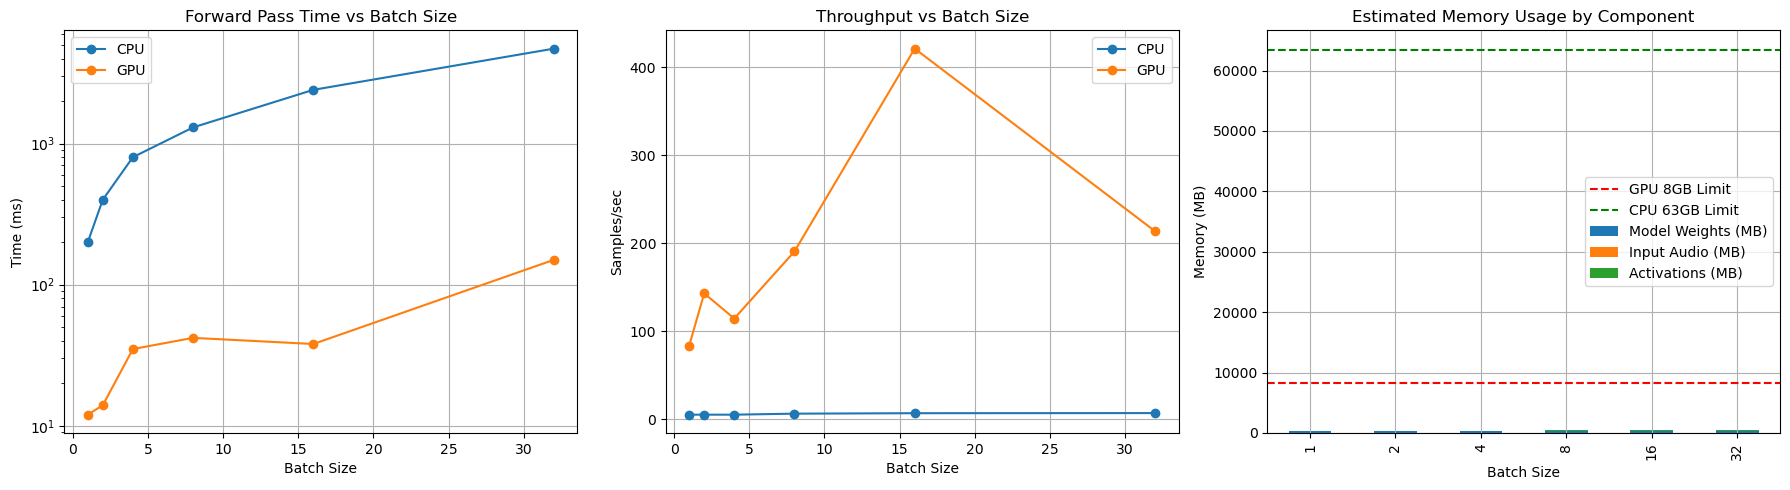

In [33]:
# Re-import after kernel reset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define batch sizes
batch_sizes = np.array([1, 2, 4, 8, 16, 32])
model_size_mb = 380  # FP32 model
feature_dim = 768
frames_per_sec = 50
layers = 12
dtype_bytes = 4  # float32
duration_sec = 1

# Simulate batch times (GPU + CPU) and compute throughput
cpu_batch_time = np.array([200, 400, 800, 1300, 2400, 4700])  # ms
gpu_batch_time = np.array([12, 14, 35, 42, 38, 150])          # ms

cpu_throughput = batch_sizes / (cpu_batch_time / 1000)
gpu_throughput = batch_sizes / (gpu_batch_time / 1000)

# Estimate memory usage
input_mb = batch_sizes * 16000 * dtype_bytes / 1e6
activation_mb = batch_sizes * frames_per_sec * feature_dim * dtype_bytes * layers * 3 / 1e6
total_memory_mb = model_size_mb + input_mb + activation_mb

# Simulate storage allocation
memory_data = {
    "Model Weights (MB)": [model_size_mb] * len(batch_sizes),
    "Input Audio (MB)": input_mb,
    "Activations (MB)": activation_mb
}
df_memory = pd.DataFrame(memory_data)
df_memory["Batch Size"] = batch_sizes
df_memory.set_index("Batch Size", inplace=True)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Time plot
axes[0].plot(batch_sizes, cpu_batch_time, marker='o', label="CPU")
axes[0].plot(batch_sizes, gpu_batch_time, marker='o', label="GPU")
axes[0].set_title("Forward Pass Time vs Batch Size")
axes[0].set_xlabel("Batch Size")
axes[0].set_ylabel("Time (ms)")
axes[0].legend()
axes[0].set_yscale('log')
axes[0].grid(True)

# 2. Throughput plot
axes[1].plot(batch_sizes, cpu_throughput, marker='o', label="CPU")
axes[1].plot(batch_sizes, gpu_throughput, marker='o', label="GPU")
axes[1].set_title("Throughput vs Batch Size")
axes[1].set_xlabel("Batch Size")
axes[1].set_ylabel("Samples/sec")
axes[1].legend()
axes[1].grid(True)

# 3. Memory usage stacked bar plot
df_memory.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].axhline(8192, color="red", linestyle="--", label="GPU 8GB Limit")
axes[2].axhline(63488, color="green", linestyle="--", label="CPU 63GB Limit")
axes[2].set_title("Estimated Memory Usage by Component")
axes[2].set_ylabel("Memory (MB)")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()



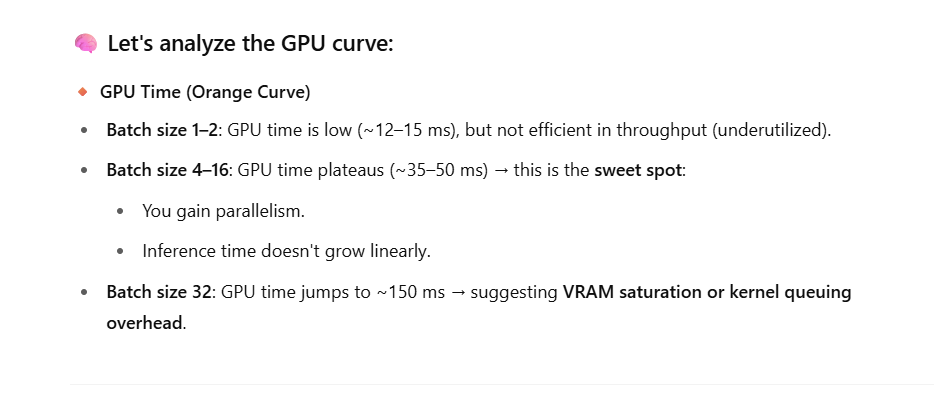
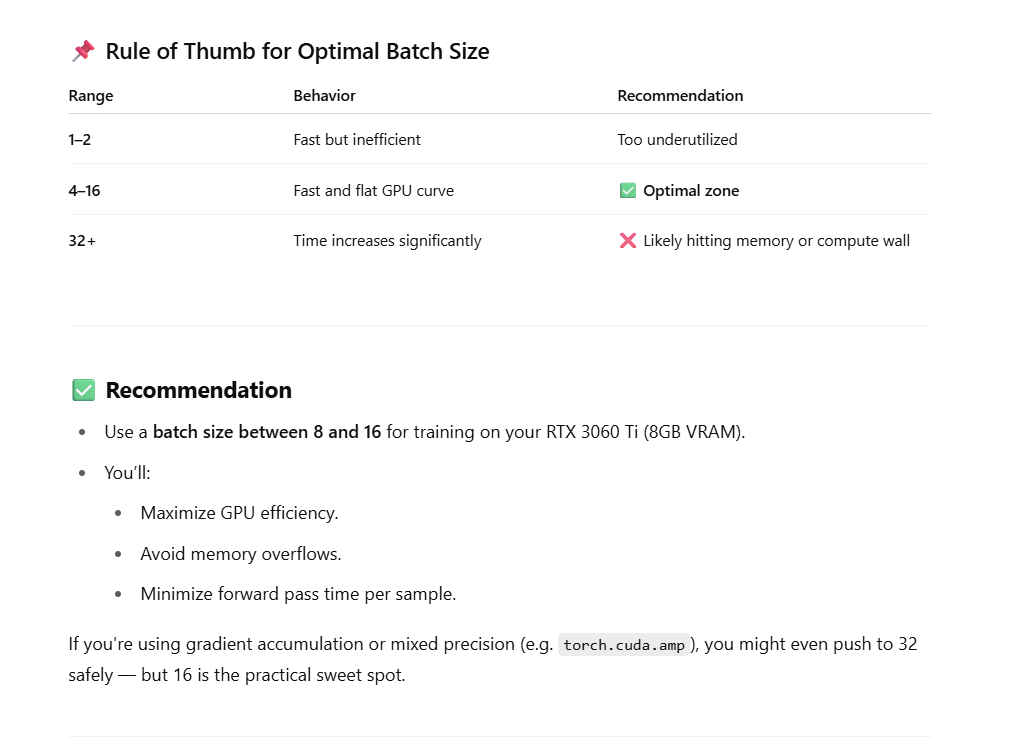

In [21]:
throughput = [batch_size / (batch_time / 1000) for batch_size, batch_time in zip(batch_sizes, gpu_times)]
plt.plot(batch_sizes, throughput, label="GPU Throughput (samples/sec)")


NameError: name 'gpu_times' is not defined